# Exploring eBay Car Sales Data

This project will use a dataset of used cars from _**eBay Kleinanzeigen**_. eBay Kleinanzeigen is an online marketplace for classified **ads** that allow buyers and sellers to meet and connect locally. With roughly 30 million users a month, eBay Kleinanzeigen is one of the most important web services for online advertisements in Germany. On average, the company has more than 50 million advertisements listed across numerous second-hand good categories. The dataset is for **ads** on secondhand **cars** that were posted on their website between the years **2015** and **2016**.

### Aim:

1. Data Cleaning.
2. Exploratory Data Analysis.

### Questions:

1. What are the popular car brands?
2. What is the most expensive car on average by brand?
3. How do car prices differ by odometer reading?

## 1. Importing Python Libraries

In [40]:
# 1. Pandas for data manipulation and analysis
import pandas as pd

# 2. Numpy for numerical data maipulation and analysis
import numpy as np

# 3. Pyplot module from Matplotlib for data visualisation
import matplotlib.pyplot as plt

# 4. Seaborn for data visualisation
import seaborn as sns 

# 5. Visualisation Style
plt.style.use('fivethirtyeight')

## 2. Loading the Dataset using Pandas

In [41]:
# Read in dataset (csv file).
df = pd.read_csv(r"C:\Users\j\Desktop\PROJECTS\autos.csv", low_memory = False)

# Display the number of rows and columns. 
df.shape

(371539, 20)

The dataset has got **371,539** rows and **20** columns.

A set of **50,000** records will be randomly sampled from **df** dataset and be assigned to a variable named **auto**.

In [42]:
# Random Sampling of 50,000 rows from "df"
auto = df.sample(n = 50000, random_state = 1, ignore_index = True)

# Display the first five rows from auto
auto.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,07-03-16 23:56,BMW_116i_TÜV_neu!_Einparkhilfe__Sitzheizung,privat,Angebot,6950.0,test,limousine,2007.0,manuell,116.0,1er,125000,2.0,benzin,bmw,nein,07-03-16 00:00,0.0,24837.0,11-03-16 14:46
1,25-03-16 18:49,Volkswagen_Golf_Cabrio_1.9_TDI,privat,Angebot,3990.0,test,cabrio,2001.0,manuell,90.0,golf,150000,4.0,diesel,volkswagen,nein,25-03-16 00:00,0.0,37081.0,01-04-16 03:46
2,07-03-16 23:54,Polo_GTI_DSG,privat,Angebot,12900.0,test,kleinwagen,2011.0,automatik,0.0,polo,60000,8.0,NaN,volkswagen,NaN,07-03-16 00:00,0.0,94474.0,05-04-16 13:47
3,10-03-16 19:56,Volkswagen_Golf_1.6_Edition,privat,Angebot,2100.0,control,limousine,2000.0,manuell,137.0,golf,150000,4.0,benzin,volkswagen,nein,10-03-16 00:00,0.0,88499.0,02-04-16 08:18
4,15-03-16 16:38,bmw_320diesel,privat,Angebot,0.0,control,limousine,2013.0,automatik,167.0,3er,150000,1.0,diesel,bmw,nein,15-03-16 00:00,0.0,12099.0,06-04-16 10:15


In [43]:
# Display the number of rows and columns in the sampled dataset
auto.shape

(50000, 20)

The new _**auto**_ dataset has got **50,000** rows and **20** columns.

The next step is to display some fundamental information of the **auto** dataset:

In [44]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dateCrawled          50000 non-null  object 
 1   name                 50000 non-null  object 
 2   seller               50000 non-null  object 
 3   offerType            50000 non-null  object 
 4   price                50000 non-null  float64
 5   abtest               50000 non-null  object 
 6   vehicleType          44912 non-null  object 
 7   yearOfRegistration   49999 non-null  float64
 8   gearbox              47304 non-null  object 
 9   powerPS              50000 non-null  float64
 10  model                47219 non-null  object 
 11  kilometer            50000 non-null  object 
 12  monthOfRegistration  49999 non-null  float64
 13  fuelType             45547 non-null  object 
 14  brand                49999 non-null  object 
 15  notRepairedDamage    40213 non-null 

## _Observations:_

  * The dataset has got 50,000 rows ranging from **0** to **49999**.
  * There are 20 columns, most of which are strings.
  * Some columns have got **missing** values
  * Some columns have got data types that are not normal. For instance,  The expectation is for *dateCrawled* column to have **datetime** data type.
  * The column names use **camelCase** instead of python's preferred **snakecase**.
  * Some columns have got **Germany** worded values; values that are presented in Germany language.

## 3. Data Cleaning

### Cleaning Column Names

Let us convert the column names from **_camelCase_** to **_snakecase_** and change some of the column names so that they become more descriptive. We are also going to introduce an **underscore** into some column names to represent a space.

In [45]:
# camelCase to snakecase
auto.columns = auto.columns.str.lower()

# renaming the some columns
auto.rename(columns = {'yearofregistration': 'registration_year', 'monthofregistration':\
                       'registration_month', 'notrepaireddamage': 'unrepaired_damage',\
                       'datecreated': 'ad_created', 'nrofpictures': 'number_of_pictures',\
                      'kilometer': 'odometer'}, inplace = True)

# Introducing an underscore in some columns
auto.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gear_box', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'number_of_pictures', 'postal_code',
       'last_seen']

# Displaying column names to check if they have been successfully cleaned
auto.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gear_box', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'number_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

### Checking for and Removing Duplicates

We are going to check for duplicate rows. If we have duplicate records we are going to remove them from our dataset.

In [46]:
# Check for duplicate rows
auto.duplicated().sum()

2

We have **2** duplicate records as identified from the code above. We are going to remove them in the following exercise.

In [47]:
# Remove duplicate rows
auto.drop_duplicates(inplace = True, ignore_index = True)

# Display the number of remaining rows and columns
auto.shape

(49998, 20)

We are remaining with **49,998** records and **20** columns after dropping duplicate rows.

### Converting Data Types

* We have columns with **numeric** data that has been stored as texts (**strings**).
* There are columns with **dates** that are stored as texts.
* We also have some columns where all or almost all values are the same. These can often be dropped as they do not have useful information.

We can determine which columns to clean by exploring the data. We are about to make a quick exploration to determine which columns to clean further.


In [48]:
# Checking data types
auto.dtypes

date_crawled           object
name                   object
seller                 object
offer_type             object
price                 float64
ab_test                object
vehicle_type           object
registration_year     float64
gear_box               object
power_ps              float64
model                  object
odometer               object
registration_month    float64
fuel_type              object
brand                  object
unrepaired_damage      object
ad_created             object
number_of_pictures    float64
postal_code           float64
last_seen              object
dtype: object

`odometer` is an **object** while it is supposed to be an **integer**. Let us convert it to an integer data type.

But first, we will find out what made python to recognise `odometer`as an object in the first place. This usually happens when there is a **text** value in an array of integers or floats.

In [49]:
auto.odometer.value_counts()

150000            32453
125000             5166
100000             2153
90000              1667
80000              1403
70000              1347
60000              1165
50000              1007
5000                955
40000               874
30000               835
20000               733
10000               239
30-03-16 00:44        1
Name: odometer, dtype: int64

The above output indicates that this `odometer` has a **typo** in the form of a **date** stored as a string. The value "30-03-16 00:44" is not supposed to be in this column. We are going to remove this record from the dataframe and convert the `odometer` to integer data type.

In [50]:
# removing a typo from the "odometer" column
auto = auto[auto['odometer'] != '30-03-16 00:44']

# converting datatype to int64
auto['odometer'] = auto['odometer'].astype('int64')

# displaying the "odometer" data type
auto['odometer'].dtype

dtype('int64')

We can see that `odometer`data type is now **int64** which is an integer.

`postal_code` is a float64 data type while it is supposed to be an object. Lets convert `postal_code`to an object.

In [51]:
# postal_code from float to an object
auto['postal_code'] = auto['postal_code'].astype('O')

# display 'postal_code' data type
auto['postal_code'].dtype

dtype('O')

`postal_code`has successfuly been converted to an object data type.

Lets  now convert `date_crawled`, `ad_created`and `last_seen`to  **datetime** data types.

In [52]:
# convert "date_crawled" to datetime.
auto['date_crawled'] = pd.to_datetime(auto['date_crawled'])

# convert "ad_created" to datetime.
auto['ad_created'] = pd.to_datetime(auto['ad_created'])

# convert "last_seen" to datetime
auto['last_seen'] = pd.to_datetime(auto['last_seen'])

# display data type for "date_crawled", "ad_created" and "last_seen"
auto[["date_crawled", "ad_created", "last_seen"]].dtypes

date_crawled    datetime64[ns]
ad_created      datetime64[ns]
last_seen       datetime64[ns]
dtype: object

We can see that our date columns have successfully been converted to **datetime64[ns]**

It has also just come to our attention that odometer is lead in **kilometers**,  therefore we have to indicate that distance is measured in kilometers. We will convert `odometer` column name to `odometer_km`.

In [53]:
# rename "odometer" to "odometer_km"
auto.rename(columns = {'odometer': 'odometer_km'}, inplace = True)

Now that our dataset is **_Presumably_** clean, let us look at some **descriptive statistics**. These might as well uncover some areas that may need more cleaning or tell us which columns to remove from our dataset.

In [54]:
# Descriptive statistics
auto.describe(include='all', datetime_is_numeric = True)

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gear_box,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,number_of_pictures,postal_code,last_seen
count,49997,49997,49997,49997,4.999700e+04,49997,44909,49997.000000,47301,49997.000000,47216,49997.000000,49997.000000,45545,49997,40211,49997,49997.0,49997.0,49997
unique,NaN,38779,1,1,NaN,2,8,NaN,2,NaN,248,NaN,NaN,7,40,2,NaN,NaN,7039.0,NaN
top,NaN,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,NaN,NaN,10115.0,NaN
freq,NaN,103,49997,49997,NaN,25874,12946,NaN,37032,NaN,4092,NaN,NaN,30176,10761,35315,NaN,NaN,106.0,NaN
mean,2016-04-27 16:13:59.649579008,NaN,NaN,NaN,1.520908e+04,NaN,NaN,2004.234234,NaN,115.065224,NaN,125760.445627,5.745685,NaN,NaN,NaN,2016-04-26 16:26:03.357801472,0.0,NaN,2016-05-08 17:33:58.011480576
min,2016-01-04 00:06:00,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,2015-11-06 00:00:00,0.0,NaN,2016-01-04 00:15:00
25%,2016-03-17 21:47:00,NaN,NaN,NaN,1.100000e+03,NaN,NaN,1999.000000,NaN,69.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,2016-03-17 00:00:00,0.0,NaN,2016-03-23 13:17:00
50%,2016-03-25 21:36:00,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,2016-03-25 00:00:00,0.0,NaN,2016-05-04 15:16:00
75%,2016-05-03 18:45:00,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,2016-05-03 00:00:00,0.0,NaN,2016-06-04 18:46:00
max,2016-12-03 23:58:00,NaN,NaN,NaN,1.000000e+08,NaN,NaN,9999.000000,NaN,13616.000000,NaN,150000.000000,12.000000,NaN,NaN,NaN,2016-12-03 00:00:00,0.0,NaN,2016-12-03 23:47:00


### _Observation:_

* Column `seller` has one value "_privat_" with a frequency of **49,997** which is equal to total number of rows.
* Column `offer_type`has one vale "_Angebot_" with a frequency of **49, 997**.
* Columns `gear_box`, `fuel_type` and `unrepaired_damage` contain values that are in **Germany** words. These columns will require further exploration and, if need be, change Germany words to their corresponding English words.
* Our dataset has got missing values. We are going to inspect the columns with missing values and come up with a better way for dealing with the missing values. That is whether to leave them as they are, replace them with other values, deleting rows with missing values or dropping columns with missing values.
* Column `price` seems to have outliers. We will have to explore it further and deal will outliers accordingly.
* Column `registration_year` has got strange values. We have a minimum value of **1000** and a maximum of **9999**, these are unrealistic values because in the year **1000** there were no cars yet and the year **9999** is in the future. We will explore this column further and make the necessary adjustments.
* The dataset was **crawled** (pull from the website) in the year **2016** as indicated by the minimum `date_crawled` of **2016-01-04** and maximum `date_crawled` of **2016-12-03** this means we expect to have data for secondhand cars that were initially registered in the years before **2016**.

### Dropping Columns

We are going to drop `seller`, `number_of_pictures` and `offer_type` because they have one **unique** value each, they are not necessary for our analysis.

In [55]:
# Drop 'seller' and 'offer_type'
auto.drop(['seller', 'offer_type', 'number_of_pictures'], axis = 1, inplace = True)
auto.shape

(49997, 17)

After dropping two columns we are remaing with **17** columns.

### Correcting Missing Values

We are going to find the number of missing values from every column and decide what to do with the missing values based on the nature of the values.

We will first find the number of `null` values in our dataset.

In [56]:
# Displaying the total number of missing values in our dataset
auto.isnull().sum()

date_crawled             0
name                     0
price                    0
ab_test                  0
vehicle_type          5088
registration_year        0
gear_box              2696
power_ps                 0
model                 2781
odometer_km              0
registration_month       0
fuel_type             4452
brand                    0
unrepaired_damage     9786
ad_created               0
postal_code              0
last_seen                0
dtype: int64

From the look of things, we have **5** columns with missing values. All these columns are categorical in nature. We are going to replace all the missing values with **"UnKnown"**. The following are the columns with missing values:

* `vehicle_type`
* `gear_box`
* `model`
* `fuel_type`
* `unrepaired_damage`

In [57]:
# Replace missing values with "UnKnown"
auto.fillna('UnKnown', inplace = True)

# Checking our dataset if we still have missing values
auto.isna().sum()

date_crawled          0
name                  0
price                 0
ab_test               0
vehicle_type          0
registration_year     0
gear_box              0
power_ps              0
model                 0
odometer_km           0
registration_month    0
fuel_type             0
brand                 0
unrepaired_damage     0
ad_created            0
postal_code           0
last_seen             0
dtype: int64

We now have a dataset without missing values as indicated in the above output.

### Cleaning `gear_box`, `fuel_type` and `unrepaired_damage` columns

These columns contain non English words. We will have to identify these words, find their English meaning and replace them with English words.

We will  start by exploring `gear_box` column.


In [58]:
# Displaying unique values in "gear_box" column
auto['gear_box'].unique()

array(['manuell', 'automatik', 'UnKnown'], dtype=object)

`gear_box` contains the following unique values **manuell**, **automatik** and **Unknown**. **Manuell** means **Manual** while **automatik** means **Automatic**. We are going replace the English words for Germany words.

In [59]:
# Cleaning "gear_box" column
auto['gear_box'] = auto['gear_box'].str.\
replace('manuell', 'Manual', regex = False).str.replace('automatik', 'Automatic', regex = False)

# Display "gear_box" unique values
auto['gear_box'].unique()

array(['Manual', 'Automatic', 'UnKnown'], dtype=object)

`gear_box`has successfully been cleaned.

Let us explore `fuel_type` column.


In [60]:
# Displaying "fuel_type" unique values
auto['fuel_type'].unique()

array(['benzin', 'diesel', 'UnKnown', 'lpg', 'cng', 'andere', 'hybrid',
       'elektro'], dtype=object)

In `fuel_type` column we are going to replace **benzin** with **_`petrol`_**, **andere** with **_`others`_** and **elektro** with **_`electric`_**.

In [61]:
# Cleaning "fuel_type" column
auto['fuel_type'] = auto['fuel_type'].str.replace('benzin', 'petrol', regex = True)\
.str.replace('andere', 'others', regex = False).str.replace('elektro', 'electric', regex = False)\
.str.replace('UnKnown', 'unknown', regex = False)

# Display "fuel_type" unique values
auto['fuel_type'].unique()

array(['petrol', 'diesel', 'unknown', 'lpg', 'cng', 'others', 'hybrid',
       'electric'], dtype=object)

`fuel_type` has successfully been cleaned.

Its time we explore `unrepaired_damage`column.

In [62]:
# Displaying "unrepaired_damage" unique values
auto['unrepaired_damage'].unique()

array(['nein', 'UnKnown', 'ja'], dtype=object)

We have **nein** for **_No_** and **ja** for **Yes**. Lets us replace these values accordingly.

In [63]:
# Cleaning "unrepaired_damage" column
auto['unrepaired_damage'] = auto['unrepaired_damage'].\
str.replace('nein', 'No', regex = False).str.replace('ja', 'Yes', regex = False)

# Display "unrepaired_damage" unique values
auto['unrepaired_damage'].unique()

array(['No', 'UnKnown', 'Yes'], dtype=object)

`unrepaired_damage` has successfully been cleaned.

Let us now clean `registration_year` column. This column has a value of **1000** as a minimum year of registration and **9999** as maximum year of registration. These values are unrealistic since in those years, cars were not have been invented and and it is in the future respectively. Let us explore the column, there might be other irregularities that could as well need our attention. 

In [64]:
auto['registration_year'].unique()

array([2007., 2001., 2011., 2000., 2013., 2005., 2002., 1996., 2004.,
       2018., 1993., 2008., 2006., 2012., 2014., 2003., 1997., 1995.,
       1994., 2010., 1998., 1999., 2016., 2009., 2017., 2015., 1971.,
       1987., 1992., 1990., 1985., 1978., 1967., 1989., 1986., 2019.,
       1980., 1982., 1991., 1951., 1968., 1983., 1950., 1988., 1973.,
       1956., 1969., 1960., 1979., 1976., 1984., 1957., 1961., 1910.,
       1965., 1977., 6000., 1972., 1962., 1000., 1974., 1958., 1970.,
       5555., 3200., 1300., 1975., 1966., 1981., 5911., 5000., 1955.,
       1964., 1939., 1933., 1963., 1953., 1400., 4800., 1600., 8455.,
       4100., 1943., 4000., 9000., 1954., 1947., 9999., 1959., 1920.,
       1936., 1952., 1800., 1929., 3000., 1932., 1111., 1938., 1946.])

It seems the column has got many unrealistic values that need to be cleaned. There are some values that represent years before  cars were invented and values that represent years from the future. Since the first car was made in **1886** we are going to filter our data to include years from **1886** to **2016** the year our data was **crawled** from the website.

In [65]:
# Filtering our dataset to remove unrealistic years
auto = auto[(auto['registration_year'] >= 1886) & (auto['registration_year'] <= 2016)].reset_index(drop=True)

# Verify if our has been cleaned
auto['registration_year'].describe()

count    48055.000000
mean      2002.814608
std          7.397660
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

We have successfully cleaned `registration_year` column. It now has a minimum year of **1910** and maximum year of **2016**. 

### Dealing with Outliers

The probable candidates for outliers in our datasets are columns `price` and `odometer_km`. Let us explore these two columns for outlier and decide how best we can deal with them. 

We will use a **boxplot** for this activity.

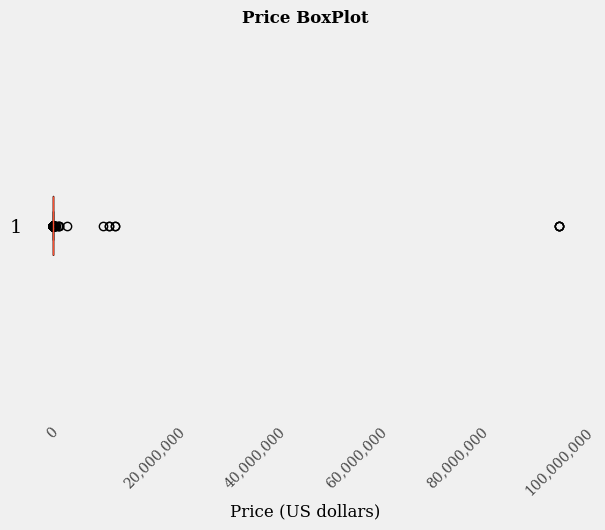

In [66]:
# Plotting a boxplot
plt.boxplot(auto['price'], vert=False )
plt.title('Price BoxPlot', fontdict={'fontfamily': 'serif', 'weight': 'bold', 'size': 12})
plt.ticklabel_format(axis = 'x', style = 'plain')
plt.xlabel('Price (US dollars)', family = 'serif', size = 12,)
plt.xticks([0, 20000000, 40000000, 60000000, 80000000, 100000000],\
           ['0', '20,000,000', '40,000,000', '60,000,000',\
            '80,000,000', '100,000,000'],rotation = 45, family = 'serif', size = 10, alpha = 0.7)
plt.grid(visible = False) 
plt.show()

From the **BoxPlot** we can see that `price` column has got outliers as some cars are indicated to be selling at a price of more than **1, 000,000** US dollars. There is even a car that is selling at a price of **100, 000,000** US dollars which is unrealistic. We also have cars which are priced at **0.00** which does not make sense. I do not think someone may place an **ad** for a car that does not have value. 

Let us filter our dataset to include cars that are selling at a price of not more than **100,000** US dollars and exclude all cars with a price of less than **500** US dollars. We will plot the **BoxPlot** to display the changes.

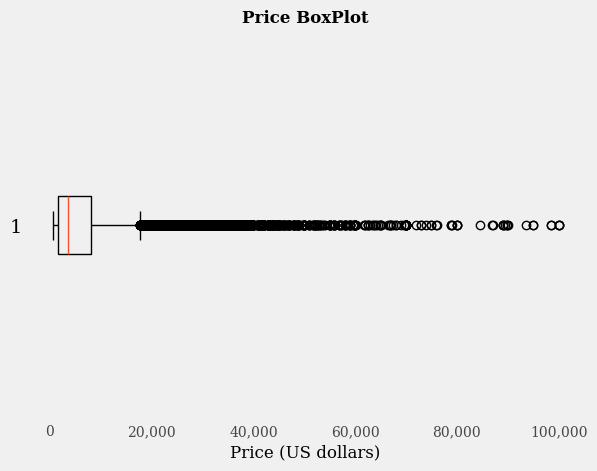

In [67]:
# Filter our dataset
auto = auto[(auto['price'] >= 500) & (auto['price'] <= 100000)]

# Plot a boxplot
plt.boxplot(auto['price'], vert = False)
plt.title('Price BoxPlot', fontdict={'fontfamily': 'serif', 'weight': 'bold', 'size': 12})
plt.xlabel('Price (US dollars)', family = 'serif', size = 12)
plt.xticks([0, 20000, 40000, 60000, 80000, 100000], \
           ['0', '20,000', '40,000', '60,000', '80,000', '100,000'],\
           fontfamily = 'serif', size = 10, alpha = 0.7)
plt.grid(visible = False)
plt.show()

We now have outliers that can make sense. A price of **100,000** US dollars for a secondhand car is realistic. 

Let us display some descriptive statistics for `price` column and see what we have about this column.

In [68]:
auto['price'].describe()

count    43326.000000
mean      6232.335826
std       7560.888729
min        500.000000
25%       1500.000000
50%       3500.000000
75%       7999.000000
max      99999.000000
Name: price, dtype: float64

We now have a `price` column that is clean. The following are the basic statistics as displayed above:
    `minimum price` **500** dollars,
    `maximum price` **99,999** dollars,
    `medium price`  **3, 500** dollars, and 
    `mean price`    **6,232** dollars. 
The **mean** value is different from **median** value because it is affected by car prices of expencive cars. It seems many cars are priced in the range between **1,500** and **7,999** dollars, so prices of more than **8,000** dollars are offsetting the value of the mean. In this case a good measure of average price could be the **Median** as it is not affected by outliers.

Let us explore `odometer_km` for outliers now. We will still use a boxplot.

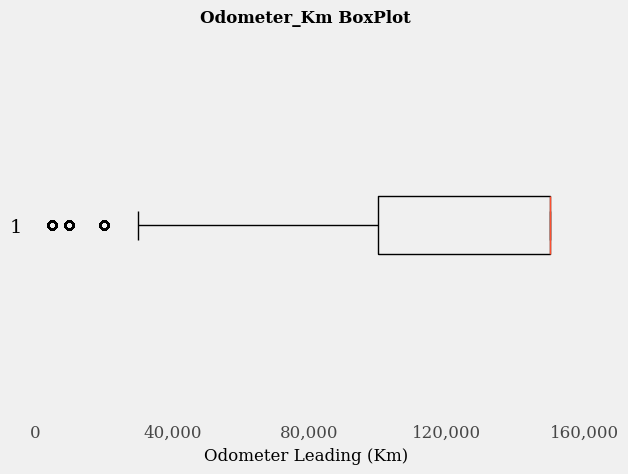

In [69]:
plt.boxplot(auto['odometer_km'], vert=False)
plt.title('Odometer_Km BoxPlot', family = 'serif', weight = 'bold', size = 12)
plt.xlabel('Odometer Leading (Km)', family = 'serif', size = 12)
plt.xticks([0, 40000, 80000, 120000, 160000], \
           ['0', '40,000', '80,000', '120,000', '160,000'], family = 'serif', size = 12, alpha = 0.7)
plt.grid(visible = False)
plt.show()

It shows that our `odomete_km` column does not have problems in as far as outliers are concerned. We have some cars with very little **mileage** and this is realistic even thought they have been presented in our boxplot. Let us display descriptive statistics for this column to get a wider perspective.

In [70]:
auto['odometer_km'].describe()

count     43326.000000
mean     125148.294327
std       39634.516717
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

The minimum **mileage** is **5,000** kilometers and maximum **mileage** is **150,000** kilometers.

Now that we have a clean dataset, let us view the first five records and last five records of our dataset.

In [71]:
auto

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gear_box,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-07-03 23:56:00,BMW_116i_TÜV_neu!_Einparkhilfe__Sitzheizung,6950.0,test,limousine,2007.0,Manual,116.0,1er,125000,2.0,petrol,bmw,No,2016-07-03,24837.0,2016-11-03 14:46:00
1,2016-03-25 18:49:00,Volkswagen_Golf_Cabrio_1.9_TDI,3990.0,test,cabrio,2001.0,Manual,90.0,golf,150000,4.0,diesel,volkswagen,No,2016-03-25,37081.0,2016-01-04 03:46:00
2,2016-07-03 23:54:00,Polo_GTI_DSG,12900.0,test,kleinwagen,2011.0,Automatic,0.0,polo,60000,8.0,unknown,volkswagen,UnKnown,2016-07-03,94474.0,2016-05-04 13:47:00
3,2016-10-03 19:56:00,Volkswagen_Golf_1.6_Edition,2100.0,control,limousine,2000.0,Manual,137.0,golf,150000,4.0,petrol,volkswagen,No,2016-10-03,88499.0,2016-02-04 08:18:00
5,2016-01-04 13:50:00,Mercedes_Benz_S_500_AMG_LPG,18000.0,control,limousine,2005.0,Automatic,387.0,s_klasse,150000,10.0,lpg,mercedes_benz,No,2016-01-04,65197.0,2016-02-04 22:29:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48050,2016-03-28 20:39:00,Audi_a4_avant,2800.0,control,kombi,2000.0,Automatic,0.0,a4,150000,0.0,diesel,audi,UnKnown,2016-03-28,26340.0,2016-03-04 01:45:00
48051,2016-06-03 16:38:00,Mercedes_Benz_w140__HU_08/17__Euro_2,3500.0,test,limousine,1994.0,Automatic,142.0,s_klasse,150000,3.0,petrol,mercedes_benz,Yes,2016-06-03,95100.0,2016-06-03 16:38:00
48052,2016-03-19 20:48:00,Fiat_500_1.2_S,8795.0,control,kleinwagen,2014.0,Manual,69.0,500,40000,10.0,petrol,fiat,Yes,2016-03-19,95697.0,2016-03-22 02:47:00
48053,2016-03-29 18:38:00,BMW_E39_540i_GPower_KW_Variante_2_Leder_Klima_...,5499.0,control,limousine,1996.0,Automatic,286.0,5er,150000,7.0,petrol,bmw,No,2016-03-29,37520.0,2016-05-04 20:18:00


Our cleaned dataset has **43326** rows and **18** columns. This dataset is now ready to be used for *Data Analysis*. 

This dataset can be exported for storage in **csv** format, excel's **xslx** formant or inserted as a table in a **Relaional Database**. We will continue our activity to conducting some Exploratory Data Analysis on our dataset.

## 4. Data Analysis

Questions to be Answered:

1. What are the popular brands?
2. What are the most expensive cars by brand?
3. How do car prices differ by odometer readings?

### Exploring Brand Popularity

Here we will try to answer the first question where we would like to find the top ten popular brands from our dataset.

In [72]:
# Frequency table for "brand" column
pop_brand = auto['brand'].value_counts()[:10]
pop_brand

volkswagen       9238
bmw              5056
mercedes_benz    4361
opel             4291
audi             4066
ford             2875
renault          1933
peugeot          1277
fiat             1021
seat              765
Name: brand, dtype: int64

From the Frequency table above, we can easily see that **volkswagen** is the most popular brand with frequency of **9238**. We can display the results on a horizonatal bar plot. 

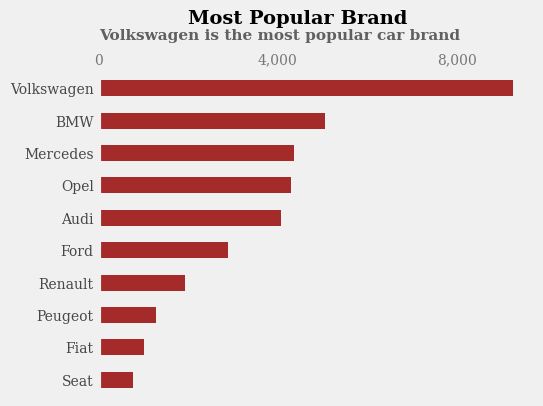

In [73]:
# Plotting a horizonatal barplot for the frequency table
fig, ax = plt.subplots(figsize=(5, 4))
pop_brand.plot.barh(color = 'brown')
ax.grid(visible=False)
ax.tick_params(labeltop = True, labelbottom = False)
ax.set_xticks([0, 4000, 8000])
ax.set_xticklabels(['0', '4,000', '8,000'], family = 'serif', alpha = 0.5, size = 10)
ax.set_yticklabels(['Volkswagen', 'BMW', 'Mercedes', 'Opel',\
                    'Audi', 'Ford', 'Renault', 'Peugeot', 'Fiat', 'Seat'],\
                   family = 'serif', size = 10, alpha = 0.7)
ax.text(x = 2000, y = -2, s = 'Most Popular Brand', \
        family = 'serif', weight = 'bold', size = 14)
ax.text(x = 0, y = -1.5, s = 'Volkswagen is the most popular car brand',\
        family = 'serif', size = 11, alpha = 0.6, weight = 'heavy')
ax.invert_yaxis()
plt.show()

From the chart above, one may easily be able to detect which car brand is the most popular one. **Volkswagen** is the most popular car brand.

### Exploring Price by Brand

Let us now explore which brands asks a high price on average. We are also going to find the top ten most expensive brands.

In [74]:
price_by_brand = auto.groupby(['brand'])['price'].mean().sort_values(ascending = False)[:10]
price_by_brand

brand
porsche           34296.164557
land_rover        18518.610526
jeep              11621.009524
sonstige_autos    11536.438172
mini              10846.144550
jaguar             9487.169014
audi               9326.134530
bmw                8561.528481
mercedes_benz      8460.017886
chevrolet          7221.761421
Name: price, dtype: float64

From the above table, on **average** the most expensive cars are the **Porsche** which are selling at an average price of **34,296.16 US dollars**. Following is a visualisation of the above findings.

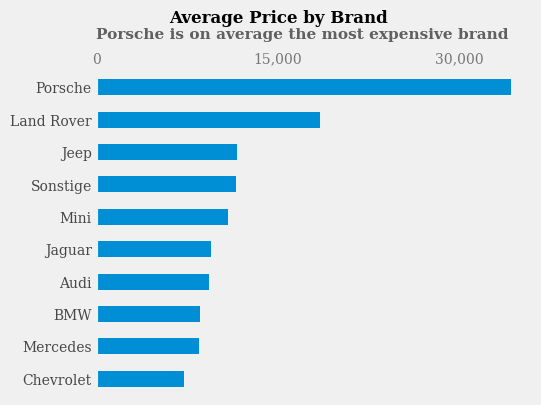

In [75]:
fig, ax = plt.subplots(figsize=(5,4))
price_by_brand.plot.barh()
ax.set_ylabel('')
ax.set_xticks([0, 15000, 30000])
ax.set_xticklabels(['0', '15,000', '30,000'], family = 'serif', alpha = 0.5, size = 10)
ax.set_yticklabels(['Porsche', 'Land Rover', 'Jeep', 'Sonstige',\
                    'Mini', 'Jaguar', 'Audi', 'BMW', 'Mercedes', \
                    'Chevrolet'], family = 'serif', size = 10, alpha = 0.7)
ax.text(x = 6000, y = -2, s = "Average Price by Brand", weight = 'bold', family = 'serif', size = 12)
ax.text(x = 0, y = -1.5, s = "Porsche is on average the most expensive brand",\
        alpha = 0.6, size = 11, weight = 'heavy', family = 'serif')
ax.invert_yaxis()
ax.tick_params(labeltop = True, labelbottom = False)
ax.grid(visible = False)
plt.show()

### Exploring price by Mileage

This is a market of secondhand cars and the expectation is that a car with a high mileage should fetch a lower price if compared to a car whose mileage is low, holding other factors constant. Cars are expected to depreciate in value as they are being used and one of the measures for indicating how much value the car has lost is mileage, the higher the mileage the lower the price. The **auto** dataset will be used to verify if the presumed assumption holds.

In this section, average car prices will be determined in relation to their mileage. The odometer readings will be grouped into three groups: **50,000 Km**, **100,000 Km** and **150,000 Km**.

In [76]:
# creating a new column "odometer_km_group"
auto['odometer_km_group'] = pd.cut(auto['odometer_km'], 3)
auto['odometer_km_group'] = auto['odometer_km_group'].astype('str')
auto['odometer_km_group'] = auto['odometer_km_group'].str.replace('(101666.667, 150000.0]', '150,000 Km', regex = False).str\
.replace('(53333.333, 101666.667]', '100,000 Km', regex = False).str.replace('(4855.0, 53333.333]', '50,000 Km', regex = False)
auto['odometer_km_group'].unique()

array(['150,000 Km', '100,000 Km', '50,000 Km'], dtype=object)

The new column `odemeter_km_group` has been created which will be used in the analysis.

The following is a calculation of average prices for every group in `odometer_km_group` column.


In [77]:
# Create a groupby and calculate average prices
mileage_group = auto.groupby('odometer_km_group')['price'].mean().sort_values(ascending = False)
mileage_group

odometer_km_group
50,000 Km     14651.190083
100,000 Km     9633.555942
150,000 Km     4426.330513
Name: price, dtype: float64

The above output has verified the assumption that was made that cars with higher mileage are more likely to fetch a lower price on the market. In other words, the value of the car is inversely related to its odometer readings. The average price for cars with **150,000 Km** is lower than the average price of cars in the **50,000 Km** group.

The same results can still be presented on a **donut** chart. 

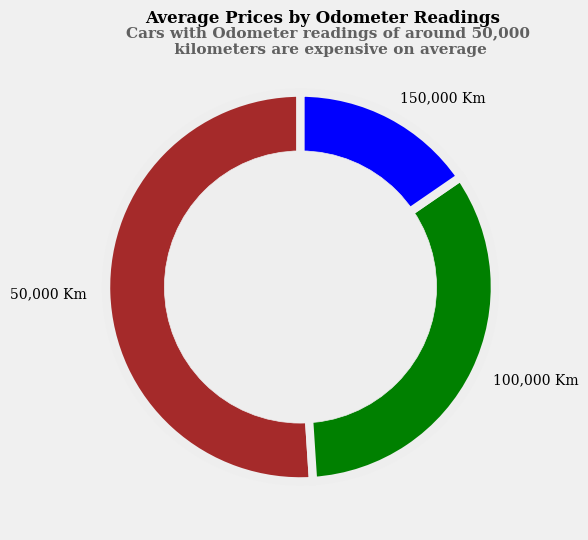

In [80]:
# Donut chart for average prices against odometer readings
fig, ax = plt.subplots(figsize=(6,6))
mileage_group.plot.pie(colors = ['brown', 'green', 'blue'],\
                       wedgeprops={'linewidth': 6, 'edgecolor': '#EEEEEE'}, startangle = 90)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 8
ax.set_axis_off()
plt.ylabel("")
my_circle=plt.Circle( (0,0), 0.7, color='#EEEEEE')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax.text(x = -0.8, y = 1.36, s = "Average Prices by Odometer Readings",\
        family = 'serif', size = 12, weight = 'bold')
ax.text(x = -0.9, y = 1.2, s = "Cars with Odometer readings of around 50,000 \n         \
kilometers are expensive on average", weight = 'heavy', size = 11, family = 'serif', alpha = 0.6)
plt.show()

### Conclution

This marks the end of the project. The main purpose was to **clean** the data making it ready for Analysis. Some intial Explorary Data Analysis were also conducted to understand important relationships among columns and discriptive statistics.

The dataset will finally be exported as a **csv file** for storage in the local drive (Desktop) and will be assigned to variable **auto_cars**.

In [79]:
# Export the dataset
auto.to_csv(r"C:\Users\j\Desktop\auto_cars.csv")

# THE END

###### McBrown Wilfred Mwale